In [1]:
# knn_regr.ipynb
# 18 Jun 2025
# KNN Regression with Feature Importance Analysis

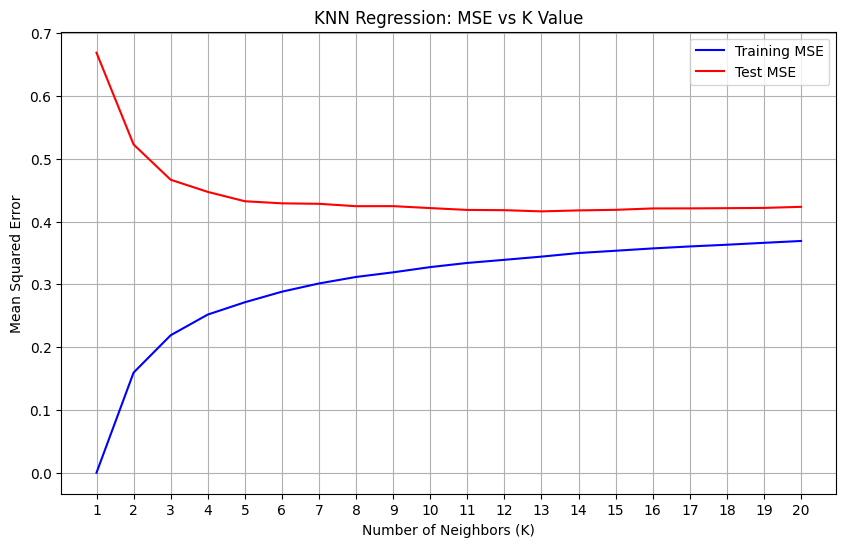


Best K value: 13


/tmp/ipykernel_10742/1824482655.py:73: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T,


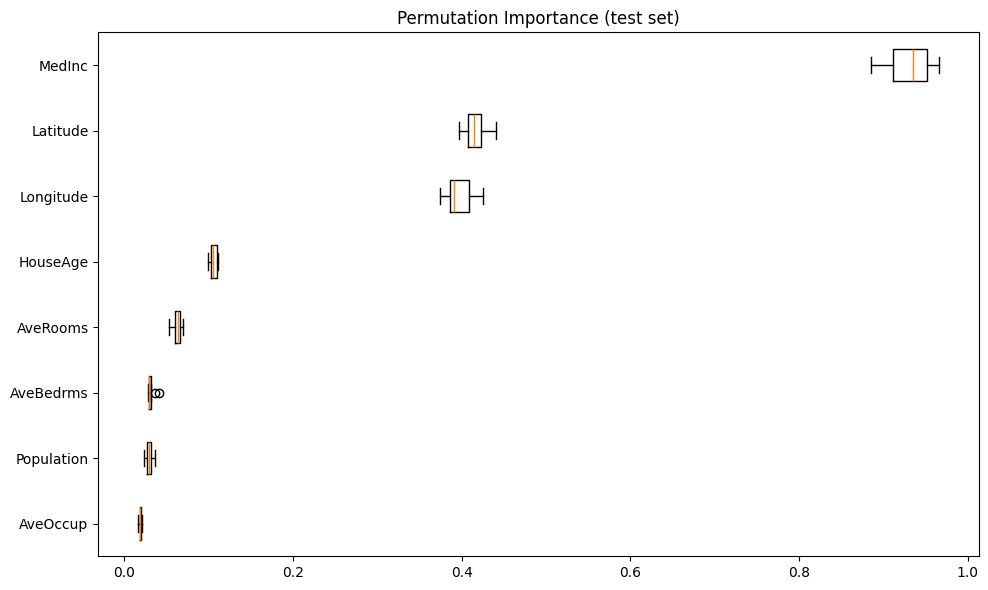

In [2]:
"""
KNN Regression with Feature Importance Analysis
This program demonstrates:
1. Using KNN for regression (predicting house prices)
2. Feature importance analysis using permutation importance
3. Comparing KNN with different K values for regression
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different K values
k_values = range(1, 21)
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Training error
    y_train_pred = knn.predict(X_train_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    
    # Test error
    y_test_pred = knn.predict(X_test_scaled)
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot MSE vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, 'b-', label='Training MSE')
plt.plot(k_values, test_errors, 'r-', label='Test MSE')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression: MSE vs K Value')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Feature importance analysis using best K
best_k = k_values[np.argmin(test_errors)]
print(f"\nBest K value: {best_k}")

knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Permutation importance
result = permutation_importance(knn_best, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Plot feature importances
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.tight_layout()
plt.show()